# cartopyを用いた空間分布図の作成

Pythonを用いて、気候学に関するデータを解析等処理を実施し、空間分布図等の形で可視化する際には、[matplotlib](https://matplotlib.org)
に加えて、地図（投影法）に関する処理を行う
[cartopy](https://scitools.org.uk/cartopy/docs/latest/)
が用いられる。
このノートブックでは、cartopyを用いた可視化の例を記述する。


なお matplotlib と cartopy に関する日本語の情報として、国立環境研究所の山下陽介さんが公開されている [気象データ解析のためのmatplotlibの使い方](https://yyousuke.github.io/matplotlib/) がある。

## 地理データの入手と保存先

気候データを解析し空間分布図を作成する際に、海岸線や河川・湖沼などのデータが必要となる。

[Natural Earth](https://www.naturalearthdata.com/)のデータや[GSHHG](https://www.soest.hawaii.edu/pwessel/gshhg/)のデータを利用できる。

次のコードでは、手元の計算機にNatural Earthの海岸線データが存在しない場合、自動的にダウンロードされる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LatitudeFormatter,LongitudeFormatter

In [2]:
fname = cartopy.io.shapereader.natural_earth(
    resolution='110m',
    category='physical',
    name='coastline'
)

また[The Generic Mapping Tools(GMT)](https://generic-mapping-tools.org)
で用いられるGSHHGデータの場合、"cartopy.io.shapereader.gshhs()"という関数が存在し、
手元の計算機にGSHHGデータが存在しない場合、データをダウンロードされる。

なお、ダウンロードしたデータは`cartopy.config['data_dir']`で表示される場所に保存される。

In [3]:
cartopy.config['data_dir']

PosixPath('/home/nobu/snap/code/176/.local/share/cartopy')

インターネットに接続されていない場合もあるので、事前に地理データをダウンロードして、展開しておくと便利である。

* Natural Earthの以下の場所からzipファイルをダウンロード可能。
    * [1:10m Physical Vectors](https://naturalearthdata.com/downloads/10m-physical-vectors/) の "Download all 10m physical themes" をクリックすると zip ファイルをダウンロードできる。
    * [1:50m Physical Vectors](https://naturalearthdata.com/downloads/10m-physical-vectors/) の "Download all 50m physical themes"  をクリックすると zip ファイルをダウンロードできる。
    * [1:110m Physical Vectors](https://naturalearthdata.com/downloads/110m-physical-vectors/) の "Download all 110m physical themes"  をクリックすると zip ファイルをダウンロードできる。
    * ファイルをダウンロードしたのち、"/home/xxxx/.local/share/cartopy/shapefiles/natural_earth/physical"に shapefile に展開する。
* GSHHGのページの"For ESRI shapefiles of shoreline polygons, rivers, and borders"から入手し、作業用のディレクトリに解凍する。解凍先のディレクトリに移動すると "GSHHS_shp" というディレクトリが存在する。GSHHS_shp に移動すると "c"/"f"/"h"/"i"/"l" と５つのディレクトリがある。これらのディレクトリを、cartopyのデータの置き場所である "/home/xxx/.local/share/cartopy/shapefiles/gshhs" 以下に移動させる。

上記のデータは以下のようなディレクトリに格納される。

In [4]:
!ls ~/.local/share/cartopy/shapefiles

gshhs  natural_earth


In [5]:
!ls ~/.local/share/cartopy/shapefiles/gshhs

c  f  h  i  l


In [6]:
!ls ~/.local/share/cartopy/shapefiles/natural_earth

cultural  physical


## 地理データの空間解像度の違い

関東地方の海岸線を描いて、地理データの空間解像度の違いを見てみる。

まずは GSHHS で海岸線を描く。

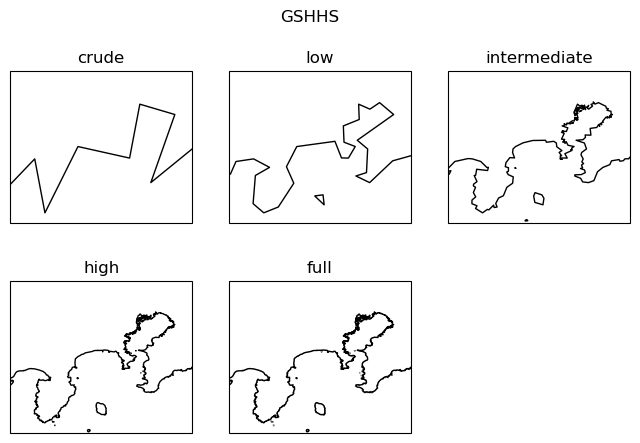

In [7]:
# bottom, right : 34.5N, 140.3E
# bottom, left  : 34.5N, 138.5E
# upper, right  : 36.0N, 140.3E
# upper, left   : 36.0N, 138.5E
coordinates = (138.5, 140.3, 34.5, 36.0)
resolutions = {
    "c": "crude",
    "l": "low",
    "i": "intermediate",
    "h": "high",
    "f": "full"
}

proj1 = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,5))

for i, res in enumerate(resolutions):
    ax = plt.subplot(2, 3, i+1, projection=proj1)
    coast = cfeature.GSHHSFeature(scale=res)
    ax.add_feature(coast)
    ax.set_xlim(coordinates[0], coordinates[1])
    ax.set_ylim(coordinates[2], coordinates[3])
    plt.title(resolutions[res])

plt.suptitle("GSHHS")
plt.show()

次に Natural Earth のデータで海岸線を描く。

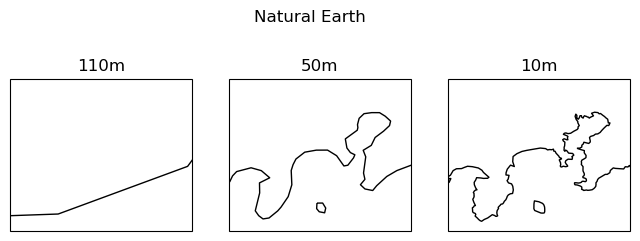

In [8]:
plt.figure(figsize=(8,3))

ax = plt.subplot(131, projection=proj1)
ax.coastlines(resolution='110m')
ax.set_xlim(coordinates[0], coordinates[1])
ax.set_ylim(coordinates[2], coordinates[3])
plt.title("110m")

ax = plt.subplot(132, projection=proj1)
ax.coastlines(resolution='50m')
ax.set_xlim(coordinates[0], coordinates[1])
ax.set_ylim(coordinates[2], coordinates[3])
plt.title("50m")

ax = plt.subplot(133, projection=proj1)
ax.coastlines(resolution='10m')
ax.set_xlim(coordinates[0], coordinates[1])
ax.set_ylim(coordinates[2], coordinates[3])
plt.title("10m")

plt.suptitle("Natural Earth")
plt.show()

## 様々な図法

正距円筒図法

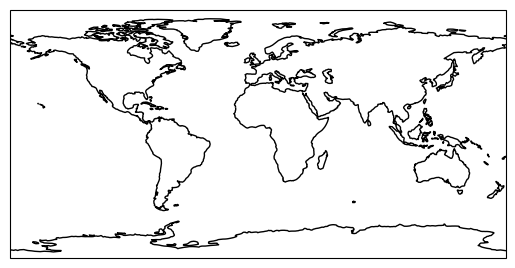

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

次のようなコードでも同じ図を作成できる。

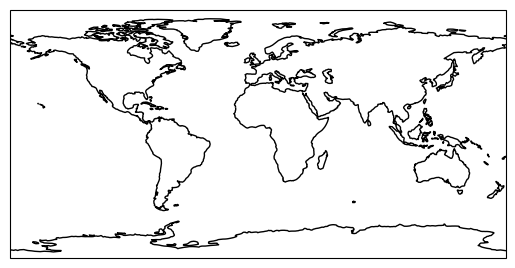

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()

日付変更線を中心とした図を作成する。

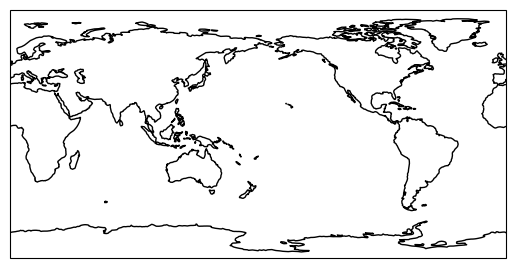

In [11]:
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}
)
ax.coastlines()

ロビンソン図法

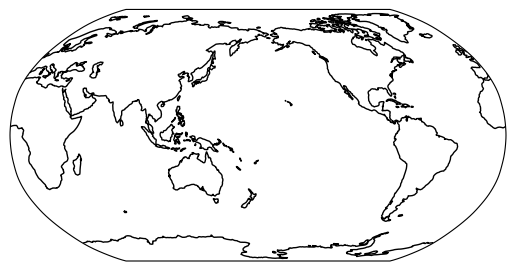

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()

ポーラーステレオ図法

ここで``add_feature(cfeature.LAND)``として、陸地を色付けして表示する。

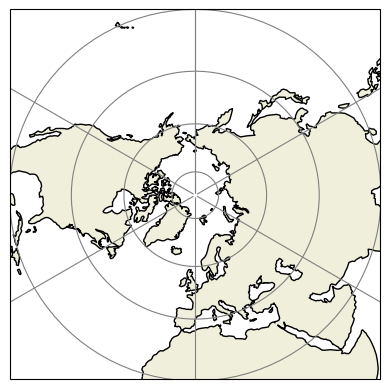

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 20, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.gridlines(linestyle="-", color="grey")

ランベルト正角円錐図法

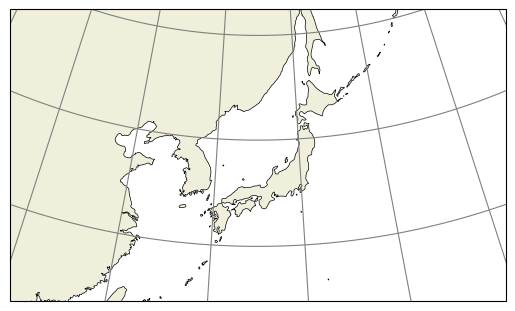

In [14]:
extent = [110,160,25,50]

fig = plt.figure()
ax = plt.axes(
    projection=ccrs.LambertConformal(
        central_longitude=135,
        central_latitude=35,
        standard_parallels=(30,60))
)
ax.set_extent(extent, ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.coastlines(resolution="50m", linewidth=0.5)
ax.gridlines(
    xlocs = mticker.MultipleLocator(10),
    ylocs = mticker.MultipleLocator(10),
    linestyle = "-",
    color = "gray"
)

湖沼や河川も描いてみる。

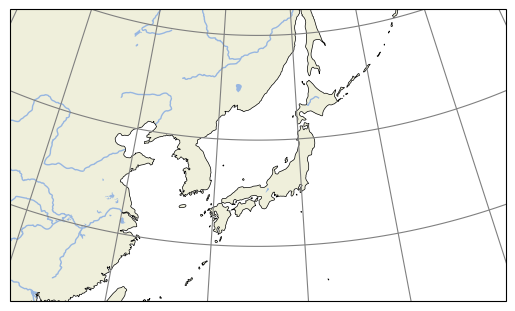

In [15]:
extent = [110,160,25,50]

fig = plt.figure()
ax = plt.axes(
    projection=ccrs.LambertConformal(
        central_longitude=135,
        central_latitude=35,
        standard_parallels=(30,60))
)
ax.set_extent(extent, ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.coastlines(resolution="50m", linewidth=0.5)
ax.gridlines(
    xlocs = mticker.MultipleLocator(10),
    ylocs = mticker.MultipleLocator(10),
    linestyle = "-",
    color = "gray"
)

## グリッド線の問題

次の例では、経度を0度〜360度の範囲で作成している（xticks）。
残念なことに作図をしてみると、西半球で南北方向に描かれるはずの子午線が描かれない。

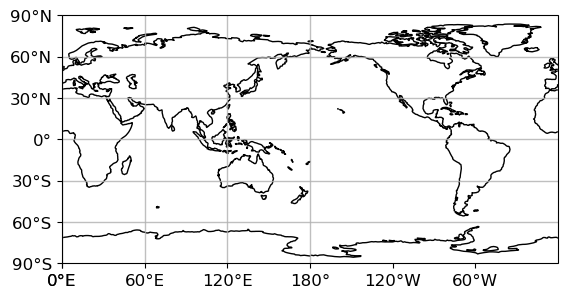

In [16]:
fig = plt.figure()
ax = fig.add_subplot(
    1,1,1,
    projection=ccrs.PlateCarree(central_longitude=180)
)

ax.set_global()
ax.coastlines()

dlon = 60
dlat = 30
xticks = np.arange(0, 360.1, dlon)
yticks = np.arange(-90, 90.1, dlat)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=False,
    linewidth=1,
    alpha=0.8
)
gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

latfmt = LatitudeFormatter()
lonfmt = LongitudeFormatter(zero_direction_label=True)
ax.xaxis.set_major_formatter(lonfmt)
ax.yaxis.set_major_formatter(latfmt)
ax.axes.tick_params(labelsize=12)

山下氏の情報によると、xticksを-180度〜180度の範囲で定義することにより子午線が描かれる。

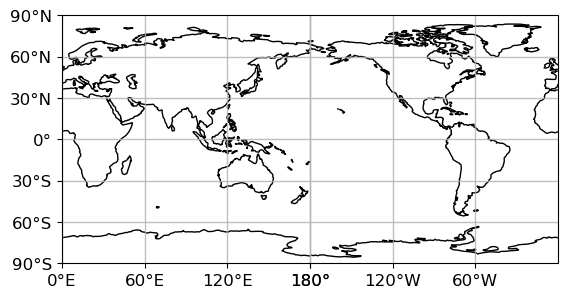

In [17]:
fig = plt.figure()
ax = fig.add_subplot(
    1,1,1,
    projection=ccrs.PlateCarree(central_longitude=180)
)

ax.set_global()
ax.coastlines()

dlon = 60
dlat = 30
xticks = np.arange(-180, 180.1, dlon)
yticks = np.arange(-90, 90.1, dlat)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=False,
    linewidth=1,
    alpha=0.8
)
gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

latfmt = LatitudeFormatter()
lonfmt = LongitudeFormatter(zero_direction_label=True)
ax.xaxis.set_major_formatter(lonfmt)
ax.yaxis.set_major_formatter(latfmt)
ax.axes.tick_params(labelsize=12)

## COBE SST2を読み込んで等値線を描く

In [18]:
import xarray as xr

In [19]:
ds = xr.open_dataset("./Data/cobe2_sst.201001.nc")
ds

<xarray.Dataset> Size: 264kB
Dimensions:  (time: 1, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 8B 2010-01-01
  * lat      (lat) float64 1kB 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    sst      (time, lat, lon) float32 259kB ...
Attributes:
    title:           JMA COBE2 SST
    URL:             https://www.data.jma.go.jp/gmd/goos/data/pub/JMA-product...
    Convensions:     CF-1.4
    ConversionDate:  2023-09-22 16:25:24

時間の次元を落とし、2次元データにするために"squeeze()"を用いる。

In [20]:
sst = ds["sst"].squeeze()
lon = ds["lon"]
lat = ds["lat"]

"squeeze"を用いず、以下のようにして2次元データにしても良い。

In [21]:
ds["sst"][0,:,:]

<xarray.DataArray 'sst' (lat: 180, lon: 360)> Size: 259kB
[64800 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2010-01-01
  * lat      (lat) float64 1kB 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sea surface temperature
    units:          K

ヨーロッパ付近に着目してSSTの空間分布図を作成する。

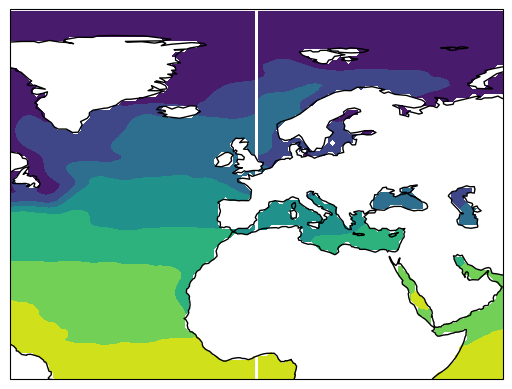

In [22]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-60,60,0,90], ccrs.PlateCarree())
ax.contourf(lon, lat, sst, transform=ccrs.PlateCarree())
ax.coastlines()

グリニッジ子午線付近で白いギャップが現れてしまう。


cartopy.util.add_cyclic_pointを用いるとこのギャップを消すことができる。

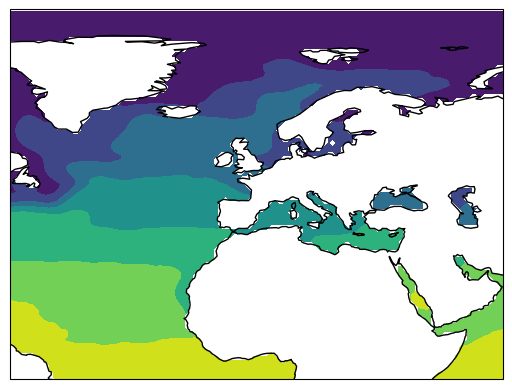

In [23]:
from cartopy.util import add_cyclic_point

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

sst2, lons = add_cyclic_point(sst, coord=lon)

ax.set_extent([-60,60,0,90], ccrs.PlateCarree())
ax.contourf(lons, lat, sst2, transform=ccrs.PlateCarree())
ax.coastlines()

ロビンソン図法でSSTの空間分布図を作成する。

Text(0.5, 1.0, 'COBE SST2')

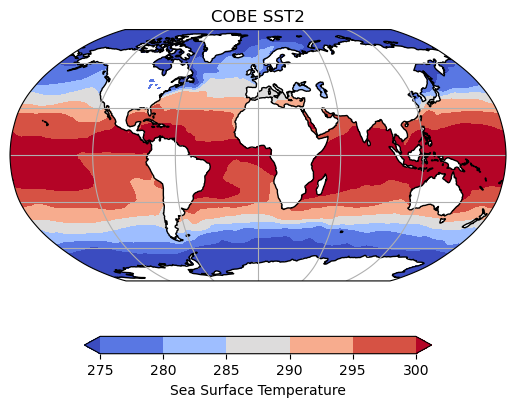

In [24]:
fig = plt.figure()

ax = plt.axes(projection=ccrs.Robinson())

cs = ax.contourf(lons, lat, sst2, 
                 transform=ccrs.PlateCarree(),
                 cmap="coolwarm",
                 extend="both")

ax.coastlines()
ax.gridlines()
cbar = plt.colorbar(cs, shrink=0.7,
                    orientation="horizontal",
                    label="Sea Surface Temperature"
                   )

plt.title("COBE SST2")

同じくロビンソン図法で、等値線のみを描く。

Text(0.5, 1.0, 'COBE SST2')

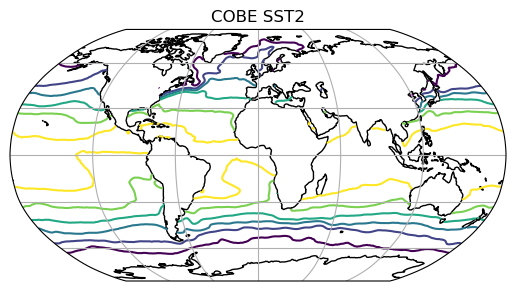

In [25]:
clevs = np.arange(275,300.1,5)

fig = plt.figure()

ax = plt.axes(projection=ccrs.Robinson())

cs = ax.contour(lons, lat, sst2, 
                transform=ccrs.PlateCarree(),
                levels=clevs)

ax.coastlines()
ax.gridlines()

plt.title("COBE SST2")

日本付近に着目して、SSTの空間分布図を描く。

Text(0.5, 1.0, 'COBE SST2')

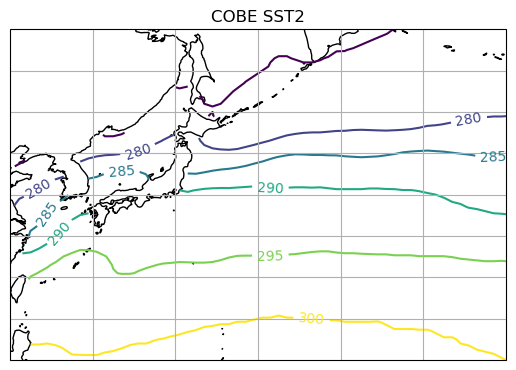

In [26]:
clevs = np.arange(275,300.1,5)
extent = [120, 180, 15, 55]

fig = plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())

cs = ax.contour(lons, lat, sst2, 
                transform=ccrs.PlateCarree(),
                levels=clevs)
clevels = cs.levels
cs.clabel(clevels)
ax.coastlines()
ax.gridlines()

plt.title("COBE SST2")

## 北西太平洋海洋長期再解析データセット（FORA-WNP30）読み込んで流速場を描く

In [27]:
ds2 = xr.open_dataset("./Data/m4dv19820101.uo.nc")
ds2

<xarray.Dataset> Size: 36MB
Dimensions:  (lonu: 673, latu: 442, depth: 30)
Coordinates:
  * lonu     (lonu) float32 3kB 116.8 116.9 117.0 117.2 ... 199.9 200.1 200.2
  * latu     (latu) float32 2kB 14.85 14.95 15.05 15.15 ... 64.75 64.92 65.08
  * depth    (depth) float32 120B 0.5 1.5 4.0 7.0 ... 540.0 600.0 670.0 740.0
Data variables:
    uo       (depth, latu, lonu) float32 36MB ...
Attributes:
    CDI:                             Climate Data Interface version 2.3.0 (ht...
    Conventions:                     CF-1.6
    source:                          MOVE-4DVAR
    institution:                     CEIST-JAMSTEC and MRI-JMA
    title:                           FORA-WNP30 (4-dimensional Ocean ReAnalys...
    history:                         Tue Nov 26 15:15:04 2024: cdo -f nc4c -z...
    references:                      Usui et al. (2016) submitted.
    m4dv_assimilation_window_start:  1982-01-01
    m4dv_assimilation_window_end:    1982-01-10
    CDO:                             Climate Data Operators version 2.3.0 (ht...

In [28]:
ds3 = xr.open_dataset("./Data/m4dv19820101.vo.nc")
ds3

<xarray.Dataset> Size: 36MB
Dimensions:  (lonu: 673, latu: 442, depth: 30)
Coordinates:
  * lonu     (lonu) float32 3kB 116.8 116.9 117.0 117.2 ... 199.9 200.1 200.2
  * latu     (latu) float32 2kB 14.85 14.95 15.05 15.15 ... 64.75 64.92 65.08
  * depth    (depth) float32 120B 0.5 1.5 4.0 7.0 ... 540.0 600.0 670.0 740.0
Data variables:
    vo       (depth, latu, lonu) float32 36MB ...
Attributes:
    CDI:                             Climate Data Interface version 2.3.0 (ht...
    Conventions:                     CF-1.6
    source:                          MOVE-4DVAR
    institution:                     CEIST-JAMSTEC and MRI-JMA
    title:                           FORA-WNP30 (4-dimensional Ocean ReAnalys...
    history:                         Tue Nov 26 15:15:06 2024: cdo -f nc4c -z...
    references:                      Usui et al. (2016) submitted.
    m4dv_assimilation_window_start:  1982-01-01
    m4dv_assimilation_window_end:    1982-01-10
    CDO:                             Climate Data Operators version 2.3.0 (ht...

流速場を矢印で表現する。

Text(0.5, 1.0, 'FORA-WNP30')

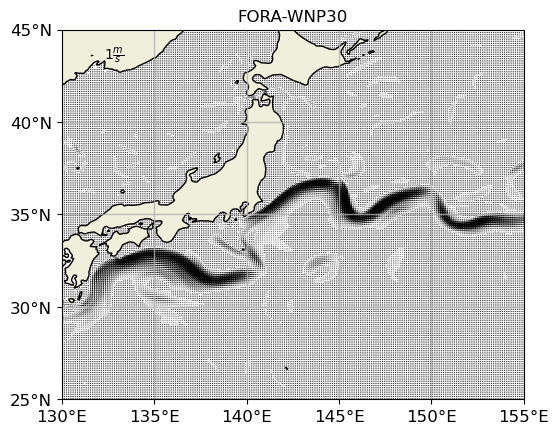

In [29]:
extent = [130, 155, 25, 45]

fig = plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())

Q = ax.quiver(ds2.lonu,
              ds2.latu,
              ds2.uo[0,:,:], 
              ds3.vo[0,:,:],
              transform=ccrs.PlateCarree())
ax.quiverkey(Q, 0.07, 0.93, 1,
             r'$1 \frac{m}{s}$',
             labelpos="E")
ax.coastlines()
ax.add_feature(cfeature.LAND)

dlon = 5
dlat = 5
xticks = np.arange(-180, 180.1, dlon)
yticks = np.arange(-90, 90.1, dlat)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=False,
    linewidth=1,
    alpha=0.8
)
gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

latfmt = LatitudeFormatter()
lonfmt = LongitudeFormatter(zero_direction_label=True)
ax.xaxis.set_major_formatter(lonfmt)
ax.yaxis.set_major_formatter(latfmt)
ax.axes.tick_params(labelsize=12)
ax.set_extent(extent, ccrs.PlateCarree())

plt.title("FORA-WNP30")

全ての格子点を用いて流速場を描くと上記のように見づらい図となってしまう。
そこで４格子おきのデータを使用して流速場を描く。

Text(0.5, 1.0, 'FORA-WNP30')

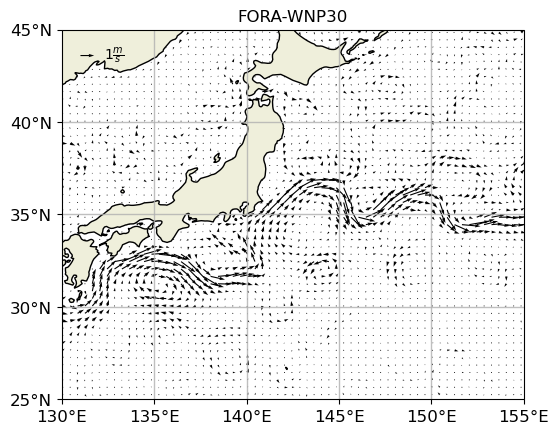

In [30]:
extent = [130, 155, 25, 45]

fig = plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())

Q = ax.quiver(ds2.lonu[::4],
              ds2.latu[::4],
              ds2.uo[0,::4,::4], 
              ds3.vo[0,::4,::4],
              transform=ccrs.PlateCarree())
ax.quiverkey(Q, 0.07, 0.93, 1,
             r'$1 \frac{m}{s}$',
             labelpos="E")
ax.coastlines()
ax.add_feature(cfeature.LAND)

dlon = 5
dlat = 5
xticks = np.arange(-180, 180.1, dlon)
yticks = np.arange(-90, 90.1, dlat)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=False,
    linewidth=1,
    alpha=0.8
)
gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

latfmt = LatitudeFormatter()
lonfmt = LongitudeFormatter(zero_direction_label=True)
ax.xaxis.set_major_formatter(lonfmt)
ax.yaxis.set_major_formatter(latfmt)
ax.axes.tick_params(labelsize=12)
ax.set_extent(extent, ccrs.PlateCarree())

plt.title("FORA-WNP30")